In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
import graphviz
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import classification_report

In [2]:
url = 'https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv'

In [3]:
df = pd.read_csv(url)

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()
# Age,Cabin and embarked has null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df['Age'][888]

nan

In [6]:
df['Age'].fillna(df['Age'].mean().round(0), inplace=True)

In [7]:
df['Age'][888]

30.0

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


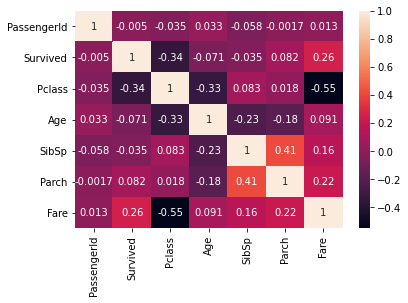

In [9]:
sns.heatmap(df.corr(),annot=True)

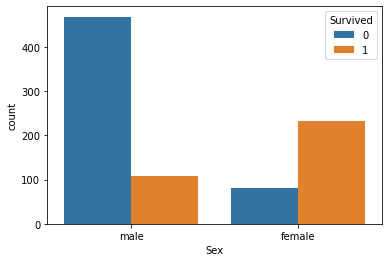

In [10]:
sns.countplot(df['Sex'],hue=df['Survived']) 

# Majority of males are there
# More number of males died during the disaster
# Higher number of females survived 

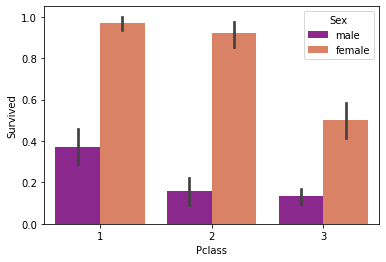

In [11]:
sns.barplot(x='Pclass',y='Survived',data=df,palette='plasma',hue='Sex') 
# Most females that survived belonged to class 1
# Males has less survival rate

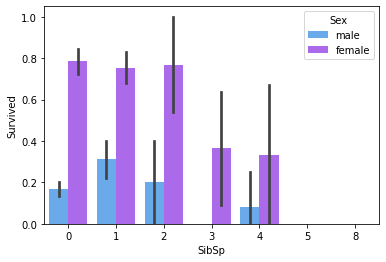

In [12]:
sns.barplot(x='SibSp',y='Survived',data=df,palette='cool',hue='Sex') 

# Most females that survived either had not siblings/spouse or had 2 siblings/spouse


In [13]:
# Following columns does not affect survived columns hence can be removed
X = df.drop(['PassengerId', 'Survived','Name', 'Ticket','Embarked'],axis=1)
y = df['Survived']

In [14]:
X.drop('Cabin',axis=1,inplace=True)

In [15]:
X['Sex'] = pd.get_dummies(X['Sex']).values

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [27]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)
print("Logistic Regression score is ",log_reg.score(x_test,y_test))

Logistic Regression score is  0.7723880597014925


In [28]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(x_train,y_train)
print("Decision Tree score is ",tree.score(x_test,y_test))

Decision Tree score is  0.7947761194029851


In [29]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
pred = tree.predict(x_test)

In [31]:
Accuracy_score = accuracy_score(y_test,pred)
Accuracy_score

0.7947761194029851

In [34]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[132  22]
 [ 33  81]]
              precision    recall  f1-score   support

           0       0.80      0.86      0.83       154
           1       0.79      0.71      0.75       114

    accuracy                           0.79       268
   macro avg       0.79      0.78      0.79       268
weighted avg       0.79      0.79      0.79       268



In [35]:
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,64,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'splitter' : ['best', 'random']
    
}

In [37]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=tree,
                     param_grid=grid_param,
                     cv=5,
                    n_jobs =-1)

In [38]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                     

In [39]:
print(grid_search.best_params_)

{'criterion': 'entropy', 'max_depth': 12, 'min_samples_leaf': 6, 'min_samples_split': 4, 'splitter': 'random'}


In [40]:
tree_final = DecisionTreeClassifier(criterion = 'entropy', max_depth =12, min_samples_leaf= 6,min_samples_split=4, splitter ='random')
tree_final.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=12, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='random')

In [41]:
tree_final.score(x_test,y_test) # NO difference at all

0.7947761194029851